In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from IPython.display import Audio
from scipy.io import wavfile
from scipy.signal import lfilter, cwt, ricker
from pylab import specgram
import librosa
import librosa.display

In [5]:

plt.rcParams["figure.figsize"] = (15, 6)

# Speech Acoustics

* How is speech produced? 
* Sources of variability in speech
* Digital speech signals
* Spectral representations of speech
* Some things we can observe about speech
* Some problems in automatic speech analysis

# How is Speech Produced

* The vocal aparatus is a physical system
* So studying how speech is made is studying Physics
* Physics: simplify the system to one we can study easily
* So, what is the speech production system? 

<img src="https://upload.wikimedia.org/wikipedia/commons/2/20/Sagittalmouth.png" width='40%'>

See also this [real time MRI of a person speaking](https://upload.wikimedia.org/wikipedia/commons/9/9f/Real-time_MRI_-_Speaking_%28English%29.ogv)

# Physics: Simpler Version

* Model the vocal tract as a series of tubes
* Simplest model has just four tubes

<img src="http://web.science.mq.edu.au/~cassidy/comp449/html/model.gif">


# Source Filter model of Speech

* Inject a source of noise at one end
* Sound is modified (filtered) by the tubes as it passes through them
* Two kinds of noise
    * Periodic excitation
    * White noise
* Corresponding to the two ways that we make noise in speech
    * Vibration of the vocal folds
    * Pushing air through a constriction

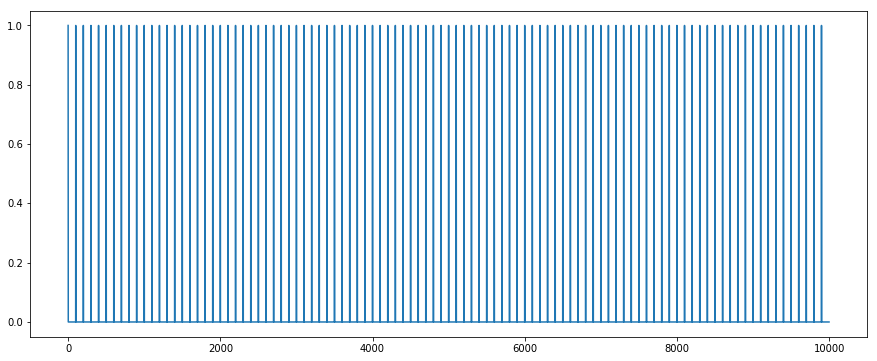

In [6]:
impulse_train = np.zeros(10000)
for i in range(0, 10000,100):
    impulse_train[i] = 1
plt.plot(impulse_train)

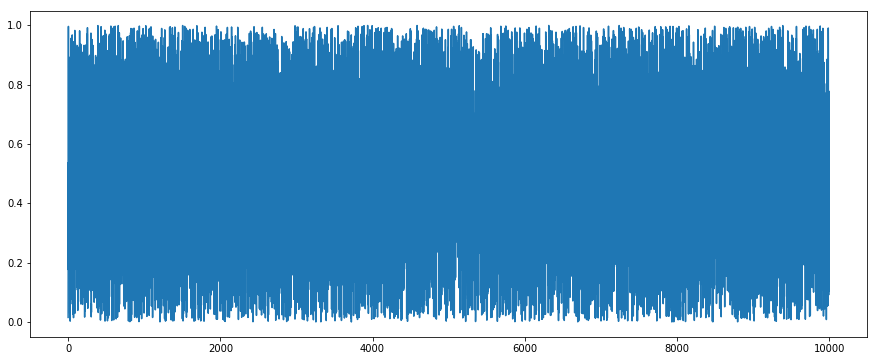

In [7]:
noise = np.random.random((10000,))
plt.plot(noise)

# What does it sound like? 

In [8]:
Audio(data=impulse_train, rate=8000)

In [9]:
Audio(data=noise, rate=8000)

# Spectral Representation

* The __spectrum__ is a representation of the acoustic signal in __frequency space__
* Calculated using a Fourier Transform
* Relies on the knowledge that any signal can be decomposed into the sum of sinusoids
* Spectrum plots frequency vs. amplitude

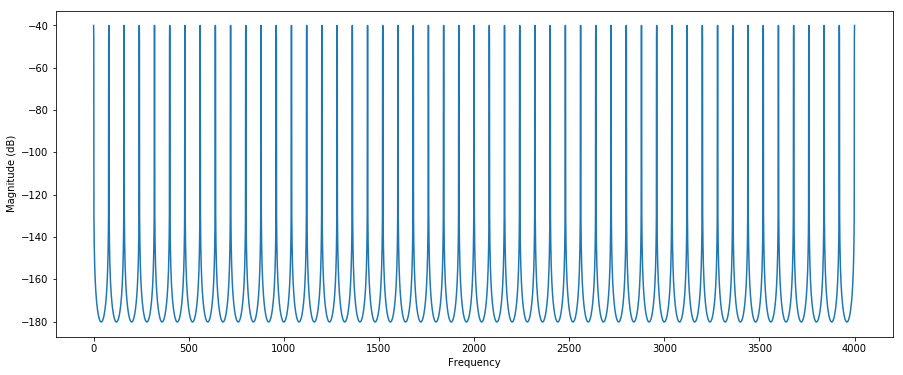

In [55]:
p = plt.magnitude_spectrum(impulse_train, Fs=8000, scale='dB')

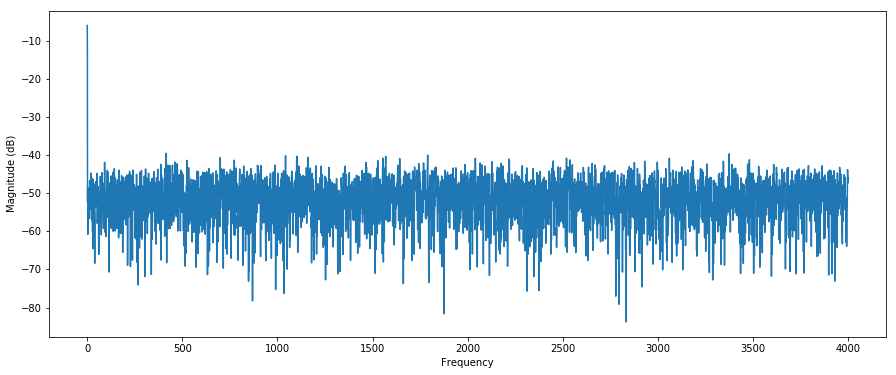

In [57]:
p = plt.magnitude_spectrum(noise, Fs=8000, scale='dB')

# Filtering Signals

* A filter is an operation that modifies the spectral envelope
* An __analogue__ filter does this by changing the sound
    * our tubes are an example of an analog filter
* A digital filter can modify a digital signal
    * lots of mathematics if you want to look at that
* Let's look at an example digital filter

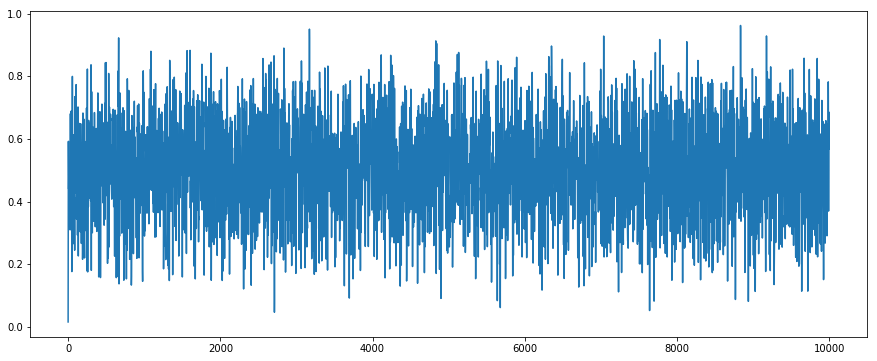

In [10]:
from scipy import signal
b, a = signal.butter(3, 0.3)
y = signal.filtfilt(b, a, noise)
plt.plot(y)
Audio(data=y, rate=8000)

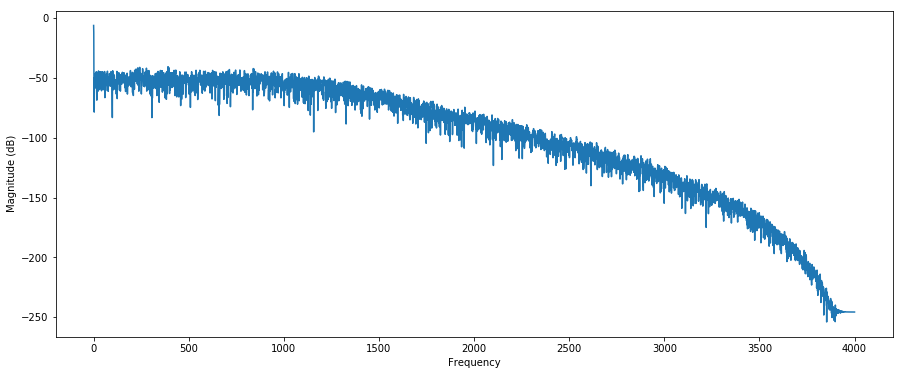

In [11]:
p = plt.magnitude_spectrum(y, Fs=8000, scale='dB')

# What about real speech spectra?

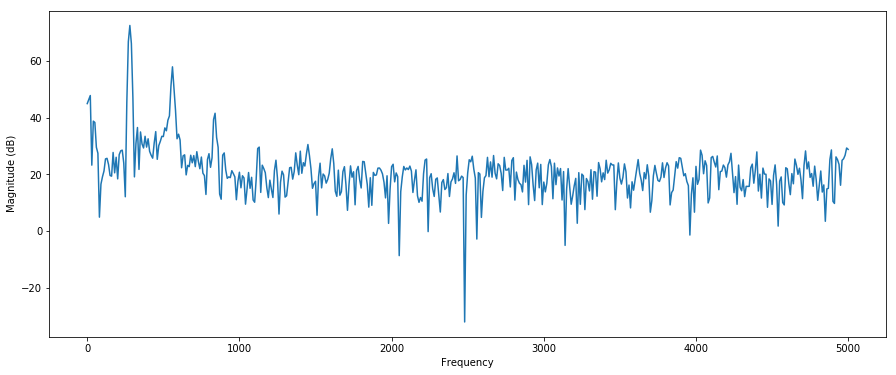

In [12]:
(fs, s) = wavfile.read('../data/nickyrose.wav')
p = plt.magnitude_spectrum(s[5000:6000], Fs=fs, scale='dB')

# Formants - Vocal Tract Resonances

* The vocal tract has __resonant frequencies__ called __formants__
* Sound energy at these frequencies is amplified
* Show as a peak in the spectrum
* As the vocal tract shape alters, formant frequencies change
* So formants can tell us what vocal tract shape is in use
* This tells us what sound is being made

# The Spectrogram

* A spectrogram is a display of a speech signal 
* Take one spectrum at regular intervals over the signal
* Plot as an image with intensity shown as shade of gray or colour
* See the change in spectral shape 

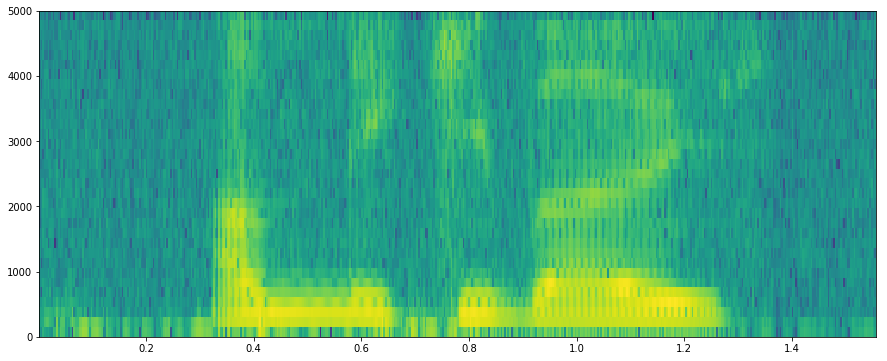

In [83]:
plot = specgram(s,NFFT=64, Fs=fs, noverlap=32)

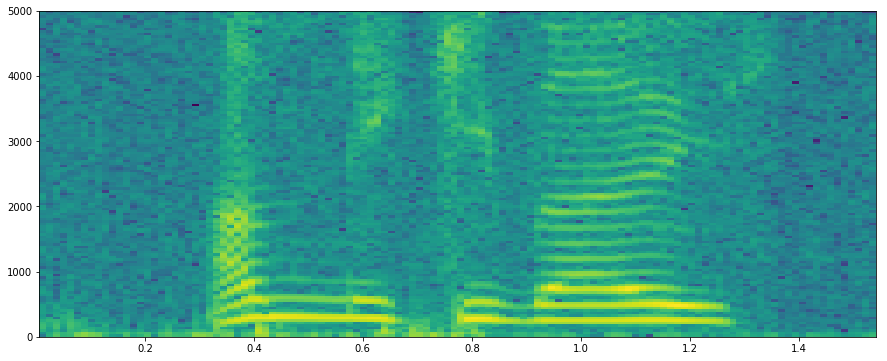

In [98]:
plot = specgram(s,NFFT=256, Fs=fs, noverlap=128)


# Formants

* The position of the formant tells us about the shape of the vocal tract:
    * F1 is related to __height__ - how high the tongue is
    * F2 is related to __backness__ - how far back the tongue is
* We can make a 2D plot of the vowels in F1/F2 space
* Layout changes for people and languages

# An F1-F2 plot

<img src="http://drammock.github.io/phonR/images/min-ex-1.png">

Source: [PhonR Documentation](http://drammock.github.io/phonR/)

# The Vowel Quadrilateral 

<img src="https://upload.wikimedia.org/wikipedia/commons/8/8c/Vowel_quadrilateral_%28IPA_1949%29.png">

Source [Wikimedia Commons](https://commons.wikimedia.org/wiki/File:Vowel_quadrilateral_(IPA_1949).png)

# Phonetics and Phonology

* Two ways of looking at speech in a language
* Phonology is an idealised picture of the sounds in a language
* Phonetics is how they are really produced
* Phonemes are the building blocks of speech
* Different languages have different sets of phonemes

# Phonetic Categories

* Vowels
* Consonants
    * Stops
    * Nasals
    * Fricatives
    * Liquids
    * Affricates

# Chinese Monopthong Vowels

<img src="https://upload.wikimedia.org/wikipedia/commons/d/d3/Beijing_Mandarin_monophthongs_chart.svg" width="50%">

Source [Wikimedia Commons](https://commons.wikimedia.org/wiki/File:Beijing_Mandarin_monophthongs_chart.svg)

# Australian English Monopthongal Vowels

<img src="https://upload.wikimedia.org/wikipedia/commons/7/72/Australian_English_vowel_chart.svg" width="50%">

Source: [Wikimedia Commons](https://commons.wikimedia.org/wiki/File:Australian_English_vowel_chart.svg)

# Perception of other Languages

* Chinese has fewer vowels than Australian English
* When a Chinese listener hears AE vowels they hear the closest Chinese vowel
    * Try _bad_ vs _bud_, _bid_ vs _bed_
* This is called __categorical perception__

# Speech Perception

* So far we've talked about how speech is produced
* But what about how we hear speech - perception
* How do our ears work? 

<img src="https://upload.wikimedia.org/wikipedia/commons/d/dc/Anatomy_of_the_Human_Ear_en.svg">

Source: [Wikimedia Commons](https://commons.wikimedia.org/wiki/File:Anatomy_of_the_Human_Ear_ar.svg)

# The Cochlea

* A spiral tube inside the ear, filled with fluid
* Sensitive 'hairs' along it's length
* Sound sets up an excitation in the tube
* Hairs vibrate to different frequencies
* Convert to electrical energy
* Sent along the cochlear nerve

<img src="https://upload.wikimedia.org/wikipedia/commons/b/bc/Cochlear_Implant.png">

Source [Wikimedia Commons](https://commons.wikimedia.org/wiki/File:Cochlear_Implant.png)

# How is this relevant for us?

* The cochlea does not have the same sensitivity to all frequencies
* It can differentiate low frequencies better than high ones
* In fact the sensitivity is logarithmic
* So our linear spectrum is not what the ear hears
* More realistic would be a logarithmic scale
* Common scale is the __mel spectrum__ 

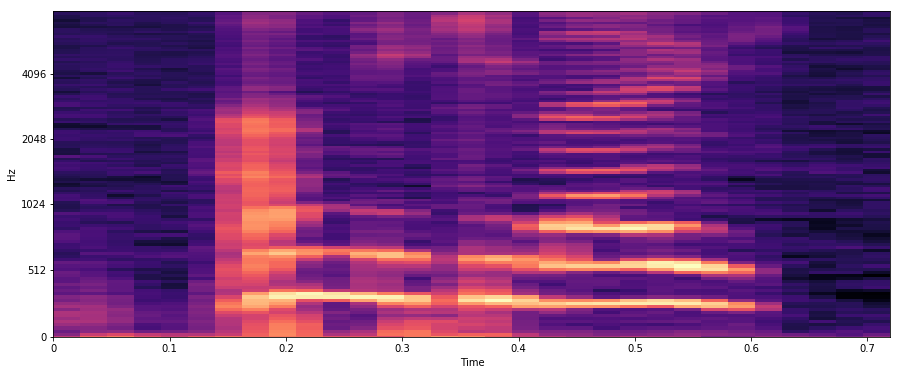

In [100]:
(fs, s) = wavfile.read('../data/nickyrose.wav')
# convert to float array for librosa
s = np.array(s, dtype=np.float64)
S = librosa.feature.melspectrogram(y=s, sr=fs)
plot = librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', fmax=8000, x_axis='time')

# Back to the Source Filter model

* We know that the speech signal combines the source + filter
* The source tells us about the speaker, about tone, about intonation
* The filter tells us what phoneme is being said
* Would be useful to be able to separate these two 
* The __cepstrum__ is one way to do this

# Cepstral Tranform

* Transform the spectrum to isolate the source and filter parts
* Start with a spectrum 
    * $F\{f(t)\}$  _($F\{x\}$ is the fourier transform)_
* Take the logarithm to make a dB spectrum 
    * $\log(|F\{f(t)\}|^2)$   _(actually log of square modulus)_
* Observe that applying a filter to a source is equivalent to multiplying thier spectra
* So when we take the log we now have the __sum__ of the two spectra
* Observe also that the source ($F0$) adds a periodic harmonic to the spectrum


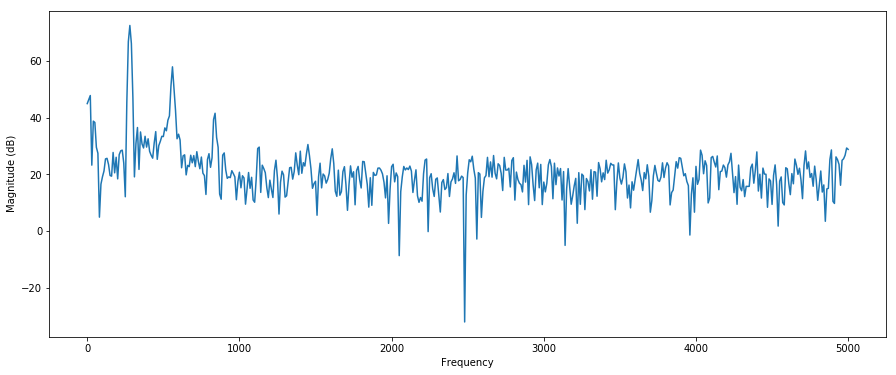

In [104]:
(fs, s) = wavfile.read('../data/nickyrose.wav')
p = plt.magnitude_spectrum(s[5000:6000], Fs=fs, scale='dB')

# Cepstral Transform

* The trick in the cepstrum is to apply an inverse FFT to the dB spectrum 
    * $cepstrum(f(t)) = F^{-1}\{\log(|F\{f(t)\}|^2)\}$
    * Inverse FFT is effectively the same as FFT 
* We're treating the spectrum as a time signal
* FFT separates high frequencies and low frequencies
* So the $F0$ harmonic will appear in the high part of the cepstrum
* The effect of the filter will appear in the low part of the cepstrum

# Cepstral Coefficients

* Common to take just the lower order cepstral coefficients
* These model the filter part of the speech signal
* Ignore the effects of the source
* Will be most useful for tasks that do not depend on pitch

# Mel Frequency Cepstral Coefficients

* Combine the two transforms
* Scale the dB spectrum using the Mel frequency scale
* Transform the spectrum into a cepstrum
* Select the lower order Mel Frequency Cepstral Coefficients
* MFCC is the most common feature set used for speech classification

# Sources of Variation in Speech

What can make two speech recordings different?

* Phonetic differences (including language, words)
* Pitch differences (intonation, tone)
* Speaker differences 
* Environmental differences (background noise, room acoustics)
* Changes in a speaker over time
* Microphone differences